<a href="https://colab.research.google.com/github/Mekk018/EV-Data-Analytics-2022/blob/main/DataAnalytics_WithPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset จาก https://www.kaggle.com**
https://www.kaggle.com/datasets/ariyoomotade/netflix-data-cleaning-analysis-and-visualization

In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime #หาวันที่ปัจจุบันด้วย library datetime
# Thai font
!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf') # 3.2+
mpl.rc('font', family='TH Sarabun New')

--2023-06-11 04:14:20--  https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf [following]
--2023-06-11 04:14:20--  https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98308 (96K) [application/octet-stream]
Saving to: ‘thsarabunnew-webfont.ttf’

thsarabunnew-webfon 100%[===================>]  96.00K  --.-KB/s    in 0.009s  

2023-06-11 04:14:20 (9.88 MB/s) 

In [2]:
movies_df = pd.read_csv('/content/netflix1.csv')
movies_df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


**ตรวจสอบประเทศที่เราสนใจ**

In [3]:
movies_df['country'].unique()

array(['United States', 'France', 'Brazil', 'United Kingdom', 'India',
       'Germany', 'Pakistan', 'Not Given', 'China', 'South Africa',
       'Japan', 'Nigeria', 'Spain', 'Philippines', 'Australia',
       'Argentina', 'Canada', 'Hong Kong', 'Italy', 'New Zealand',
       'Egypt', 'Colombia', 'Mexico', 'Belgium', 'Switzerland', 'Taiwan',
       'Bulgaria', 'Poland', 'South Korea', 'Saudi Arabia', 'Thailand',
       'Indonesia', 'Kuwait', 'Malaysia', 'Vietnam', 'Lebanon', 'Romania',
       'Syria', 'United Arab Emirates', 'Sweden', 'Mauritius', 'Austria',
       'Turkey', 'Czech Republic', 'Cameroon', 'Netherlands', 'Ireland',
       'Russia', 'Kenya', 'Chile', 'Uruguay', 'Bangladesh', 'Portugal',
       'Hungary', 'Norway', 'Singapore', 'Iceland', 'Serbia', 'Namibia',
       'Peru', 'Mozambique', 'Ghana', 'Zimbabwe', 'Israel', 'Finland',
       'Denmark', 'Paraguay', 'Cambodia', 'Georgia', 'Soviet Union',
       'Greece', 'West Germany', 'Iran', 'Venezuela', 'Slovenia',
       'Gua

**ต้องการทราบจำนวนทั้งหมดที่เราสนใจ**

In [4]:
ko_th_df = movies_df[movies_df['country'].isin(['Thailand', 'South Korea'])]
ko_th_df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
536,s399,Movie,Kingdom: Ashin of the North,Kim Seong-hun,South Korea,7/23/2021,2021,TV-MA,94 min,"Horror Movies, International Movies, Thrillers"
602,s440,Movie,Deep,"Sita Likitvanichkul, Jetarin Ratanaserikiat, A...",Thailand,7/16/2021,2021,TV-MA,101 min,"Dramas, International Movies, Thrillers"
646,s485,Movie,Lee Su-geun: The Sense Coach,Kim Joo-hyung,South Korea,7/9/2021,2021,TV-G,46 min,Stand-Up Comedy
707,s556,Movie,Snowpiercer,Bong Joon Ho,South Korea,7/2/2021,2013,R,126 min,"Action & Adventure, Cult Movies, International..."
708,s557,Movie,The 8th Night,Kim Tae-hyung,South Korea,7/2/2021,2021,TV-14,116 min,"Horror Movies, International Movies, Thrillers"
...,...,...,...,...,...,...,...,...,...,...
8726,s8380,TV Show,The Lady in Dignity,Not Given,South Korea,1/30/2018,2017,TV-MA,1 Season,"International TV Shows, Korean TV Shows, TV Dr..."
8752,s8575,TV Show,ThirTEEN Terrors,Not Given,Thailand,3/1/2019,2014,TV-14,1 Season,"International TV Shows, TV Horror, TV Mysteries"
8753,s8576,TV Show,This Is My Love,Not Given,South Korea,5/22/2017,2015,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman..."
8764,s8654,TV Show,Ugly Duckling,Not Given,Thailand,2/15/2019,2015,TV-14,4 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


**Plot กราฟจากข้อมูล ko_th_df**

In [5]:
# แปลงคอลัมน์ "date_added" เป็นรูปแบบวันที่
ko_th_df['date_added'] = pd.to_datetime(ko_th_df['date_added'], format='%m/%d/%Y')
ko_th_df

<ipython-input-5-0ffa15a6ffc4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ko_th_df['date_added'] = pd.to_datetime(ko_th_df['date_added'], format='%m/%d/%Y')


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
536,s399,Movie,Kingdom: Ashin of the North,Kim Seong-hun,South Korea,2021-07-23,2021,TV-MA,94 min,"Horror Movies, International Movies, Thrillers"
602,s440,Movie,Deep,"Sita Likitvanichkul, Jetarin Ratanaserikiat, A...",Thailand,2021-07-16,2021,TV-MA,101 min,"Dramas, International Movies, Thrillers"
646,s485,Movie,Lee Su-geun: The Sense Coach,Kim Joo-hyung,South Korea,2021-07-09,2021,TV-G,46 min,Stand-Up Comedy
707,s556,Movie,Snowpiercer,Bong Joon Ho,South Korea,2021-07-02,2013,R,126 min,"Action & Adventure, Cult Movies, International..."
708,s557,Movie,The 8th Night,Kim Tae-hyung,South Korea,2021-07-02,2021,TV-14,116 min,"Horror Movies, International Movies, Thrillers"
...,...,...,...,...,...,...,...,...,...,...
8726,s8380,TV Show,The Lady in Dignity,Not Given,South Korea,2018-01-30,2017,TV-MA,1 Season,"International TV Shows, Korean TV Shows, TV Dr..."
8752,s8575,TV Show,ThirTEEN Terrors,Not Given,Thailand,2019-03-01,2014,TV-14,1 Season,"International TV Shows, TV Horror, TV Mysteries"
8753,s8576,TV Show,This Is My Love,Not Given,South Korea,2017-05-22,2015,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman..."
8764,s8654,TV Show,Ugly Duckling,Not Given,Thailand,2019-02-15,2015,TV-14,4 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


<Axes: ylabel='Frequency'>

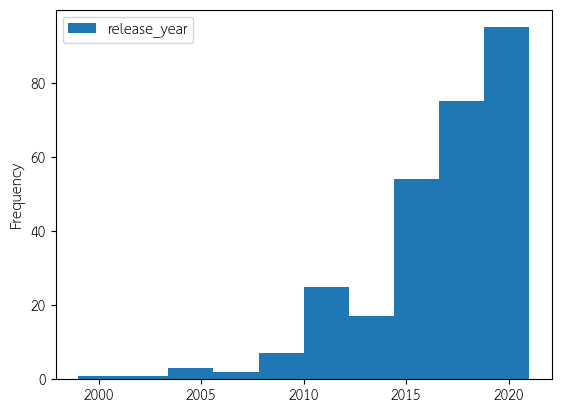

In [6]:
ko_th_df.plot(kind = 'hist', x= 'date_added', y = 'release_year')

**แยกความแตกต่าง เพื่อหา Insight แต่ละประเทศ**

**ไทย**

In [7]:
thailand_df = ko_th_df[ko_th_df['country']=='Thailand']
thailand_df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
602,s440,Movie,Deep,"Sita Likitvanichkul, Jetarin Ratanaserikiat, A...",Thailand,2021-07-16,2021,TV-MA,101 min,"Dramas, International Movies, Thrillers"
904,s837,Movie,Ghost Lab,Paween Purijitpanya,Thailand,2021-05-27,2021,TV-MA,118 min,"Horror Movies, International Movies, Thrillers"
1013,s989,TV Show,Let's Fight Ghost,Kongkiat Khomsiri,Thailand,2021-04-23,2021,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
1060,s1068,TV Show,The Underclass,Pass Patthanakumjon,Thailand,2021-04-14,2020,TV-MA,1 Season,"International TV Shows, TV Dramas, Teen TV Shows"
1690,s2000,Movie,Hope Frozen: A Quest to Live Twice,Pailin Wedel,Thailand,2020-09-15,2020,TV-PG,80 min,"Documentaries, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8493,s6997,TV Show,Hormones,Not Given,Thailand,2018-06-30,2015,TV-MA,3 Seasons,"International TV Shows, Romantic TV Shows, TV ..."
8650,s7893,TV Show,Roonpi Secret Love,Not Given,Thailand,2019-06-21,2016,TV-14,3 Seasons,"International TV Shows, Romantic TV Shows, Tee..."
8672,s8059,TV Show,Sotus The Series,Not Given,Thailand,2019-05-25,2016,TV-MA,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8752,s8575,TV Show,ThirTEEN Terrors,Not Given,Thailand,2019-03-01,2014,TV-14,1 Season,"International TV Shows, TV Horror, TV Mysteries"


In [8]:
thailand_df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [9]:
type_Movie_df = thailand_df[thailand_df['type']=='Movie']
type_Movie_df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
602,s440,Movie,Deep,"Sita Likitvanichkul, Jetarin Ratanaserikiat, A...",Thailand,2021-07-16,2021,TV-MA,101 min,"Dramas, International Movies, Thrillers"
904,s837,Movie,Ghost Lab,Paween Purijitpanya,Thailand,2021-05-27,2021,TV-MA,118 min,"Horror Movies, International Movies, Thrillers"
1690,s2000,Movie,Hope Frozen: A Quest to Live Twice,Pailin Wedel,Thailand,2020-09-15,2020,TV-PG,80 min,"Documentaries, International Movies"
1938,s2373,Movie,One Take,Manatsanun Phanlerdwongsakul,Thailand,2020-06-18,2020,TV-G,86 min,"Documentaries, International Movies, Music & M..."
2221,s2776,Movie,Happy Old Year,Nawapol Thamrongrattanarit,Thailand,2020-03-26,2019,TV-MA,113 min,"Dramas, International Movies, Romantic Movies"
2263,s2843,Movie,Tootsies & The Fake,Kittiphak Thonguam,Thailand,2020-03-05,2019,TV-MA,108 min,"Comedies, International Movies, LGBTQ Movies"
2494,s3201,Movie,Tee Shot: Ariya Jutanugarn,Tanawat Aiemjinda,Thailand,2019-12-01,2019,TV-14,103 min,"Children & Family Movies, Dramas, Internationa..."
2775,s3699,Movie,Inhuman Kiss,Sittisiri Mongkolsiri,Thailand,2019-06-30,2019,TV-MA,122 min,"Horror Movies, International Movies, Romantic ..."
2785,s3718,Movie,Triple Threat,"Jesse V. Johnson, Jesse Johnson",Thailand,2019-06-22,2019,R,96 min,"Action & Adventure, International Movies"
2934,s3979,Movie,Oversize Cops,"Chanon Yingyong, Phuwanit Pholdee",Thailand,2019-03-23,2017,TV-MA,100 min,"Action & Adventure, Comedies, International Mo..."


In [10]:
counts_Movie = type_Movie_df['type'].value_counts()
counts_Movie

Movie    42
Name: type, dtype: int64

In [11]:
type_TvShow_df = thailand_df[thailand_df['type']=='TV Show']
type_TvShow_df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
1013,s989,TV Show,Let's Fight Ghost,Kongkiat Khomsiri,Thailand,2021-04-23,2021,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
1060,s1068,TV Show,The Underclass,Pass Patthanakumjon,Thailand,2021-04-14,2020,TV-MA,1 Season,"International TV Shows, TV Dramas, Teen TV Shows"
1865,s2276,TV Show,Hook,Rachit Kusonkoonsiri,Thailand,2020-07-05,2020,TV-MA,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
2047,s2528,TV Show,Sleepless Society: Two Pillows & A Lost Soul,Sivaroj Kongsakul,Thailand,2020-05-15,2020,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas"
2321,s2924,TV Show,Sleepless Society: Insomnia,"Pantham Thongsang, Cheewatan Pusitsuksa",Thailand,2020-02-13,2019,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas"
6672,s517,TV Show,Girl from Nowhere,Not Given,Thailand,2021-07-06,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
6711,s660,TV Show,Bangkok Love Stories: Innocence,Not Given,Thailand,2021-06-19,2018,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
6725,s680,TV Show,The Judgement,Not Given,Thailand,2021-06-19,2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas"
7466,s3250,TV Show,Bangkok Buddies,Not Given,Thailand,2019-11-20,2019,TV-MA,1 Season,"International TV Shows, TV Comedies, TV Dramas"
7480,s3282,TV Show,The Stranded,Not Given,Thailand,2019-11-15,2019,TV-MA,1 Season,"International TV Shows, TV Action & Adventure,..."


In [12]:
counts_TVShow = type_TvShow_df['type'].value_counts()
counts_TVShow

TV Show    24
Name: type, dtype: int64

<Axes: ylabel='Frequency'>

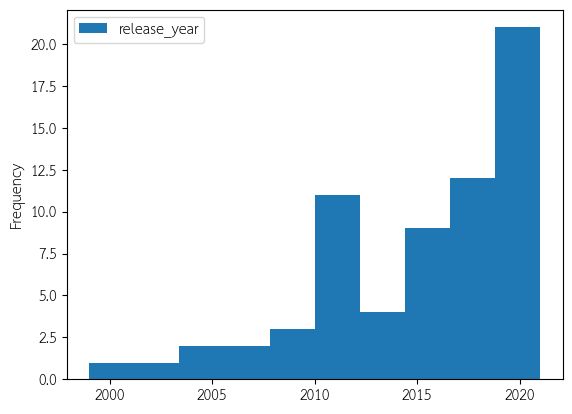

In [13]:
thailand_df.plot(kind = 'hist', x= 'date_added', y = 'release_year')

**เกาหลีใต้**

In [14]:
South_Korea_df = ko_th_df[ko_th_df['country']=='South Korea']
South_Korea_df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
536,s399,Movie,Kingdom: Ashin of the North,Kim Seong-hun,South Korea,2021-07-23,2021,TV-MA,94 min,"Horror Movies, International Movies, Thrillers"
646,s485,Movie,Lee Su-geun: The Sense Coach,Kim Joo-hyung,South Korea,2021-07-09,2021,TV-G,46 min,Stand-Up Comedy
707,s556,Movie,Snowpiercer,Bong Joon Ho,South Korea,2021-07-02,2013,R,126 min,"Action & Adventure, Cult Movies, International..."
708,s557,Movie,The 8th Night,Kim Tae-hyung,South Korea,2021-07-02,2021,TV-14,116 min,"Horror Movies, International Movies, Thrillers"
806,s763,Movie,Sweet & Sour,Lee Kae-byeok,South Korea,2021-06-04,2021,TV-14,103 min,"Comedies, International Movies, Romantic Movies"
...,...,...,...,...,...,...,...,...,...,...
8705,s8258,TV Show,The Cravings,Not Given,South Korea,2017-04-20,2016,TV-14,2 Seasons,"International TV Shows, Korean TV Shows, TV Co..."
8716,s8331,Movie,The Great Battle,Not Given,South Korea,2019-04-08,2018,TV-MA,136 min,"Action & Adventure, Dramas, International Movies"
8726,s8380,TV Show,The Lady in Dignity,Not Given,South Korea,2018-01-30,2017,TV-MA,1 Season,"International TV Shows, Korean TV Shows, TV Dr..."
8753,s8576,TV Show,This Is My Love,Not Given,South Korea,2017-05-22,2015,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman..."


In [15]:
South_Korea_df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [16]:
type_Movie_df2 = South_Korea_df[South_Korea_df['type']=='Movie']
type_Movie_df2

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
536,s399,Movie,Kingdom: Ashin of the North,Kim Seong-hun,South Korea,2021-07-23,2021,TV-MA,94 min,"Horror Movies, International Movies, Thrillers"
646,s485,Movie,Lee Su-geun: The Sense Coach,Kim Joo-hyung,South Korea,2021-07-09,2021,TV-G,46 min,Stand-Up Comedy
707,s556,Movie,Snowpiercer,Bong Joon Ho,South Korea,2021-07-02,2013,R,126 min,"Action & Adventure, Cult Movies, International..."
708,s557,Movie,The 8th Night,Kim Tae-hyung,South Korea,2021-07-02,2021,TV-14,116 min,"Horror Movies, International Movies, Thrillers"
806,s763,Movie,Sweet & Sour,Lee Kae-byeok,South Korea,2021-06-04,2021,TV-14,103 min,"Comedies, International Movies, Romantic Movies"
1070,s1086,Movie,Night in Paradise,Park Hoon-jung,South Korea,2021-04-09,2021,TV-MA,132 min,"Dramas, International Movies"
1256,s1343,Movie,Space Sweepers,Jo Sung-hee,South Korea,2021-02-05,2021,TV-MA,138 min,"Action & Adventure, Dramas, International Movies"
1300,s1413,Movie,Wish You,Sung Do-jun,South Korea,2021-01-15,2021,TV-PG,102 min,"Dramas, International Movies, LGBTQ Movies"
1337,s1469,Movie,What Happened to Mr. Cha?,Kim Dong-kyu,South Korea,2021-01-01,2021,TV-MA,102 min,"Comedies, International Movies"
1449,s1644,Movie,The Call,Lee Chung-hyun,South Korea,2020-11-27,2020,TV-MA,112 min,"International Movies, Thrillers"


In [17]:
counts_Movie2 = type_Movie_df2['type'].value_counts()
counts_Movie2

Movie    49
Name: type, dtype: int64

In [18]:
type_Movie_df3 = South_Korea_df[South_Korea_df['type']=='TV Show']
type_Movie_df3

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
1140,s1174,TV Show,Men on a Mission,Jung-ah Im,South Korea,2021-03-23,2021,TV-14,6 Seasons,"International TV Shows, Korean TV Shows, Stand..."
1761,s2109,TV Show,Goedam,Hong Won-ki,South Korea,2020-08-20,2020,TV-MA,1 Season,"International TV Shows, TV Horror, TV Mysteries"
1992,s2448,TV Show,Dear My Friends,Not Given,South Korea,2020-06-01,2016,TV-MA,1 Season,"International TV Shows, Korean TV Shows, TV Dr..."
2247,s2822,TV Show,Kingdom,Kim Seong-hun,South Korea,2020-03-13,2020,TV-MA,2 Seasons,"International TV Shows, Korean TV Shows, TV Ac..."
2583,s3359,TV Show,"Bring It On, Ghost",Park Joon-hwa,South Korea,2019-10-30,2016,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman..."
...,...,...,...,...,...,...,...,...,...,...
8683,s8118,TV Show,Suits,Not Given,South Korea,2019-12-01,2018,TV-MA,1 Season,"International TV Shows, Korean TV Shows, TV Co..."
8705,s8258,TV Show,The Cravings,Not Given,South Korea,2017-04-20,2016,TV-14,2 Seasons,"International TV Shows, Korean TV Shows, TV Co..."
8726,s8380,TV Show,The Lady in Dignity,Not Given,South Korea,2018-01-30,2017,TV-MA,1 Season,"International TV Shows, Korean TV Shows, TV Dr..."
8753,s8576,TV Show,This Is My Love,Not Given,South Korea,2017-05-22,2015,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman..."


In [19]:
counts_Movie2 = type_Movie_df3['type'].value_counts()
counts_Movie2

TV Show    165
Name: type, dtype: int64

<Axes: ylabel='Frequency'>

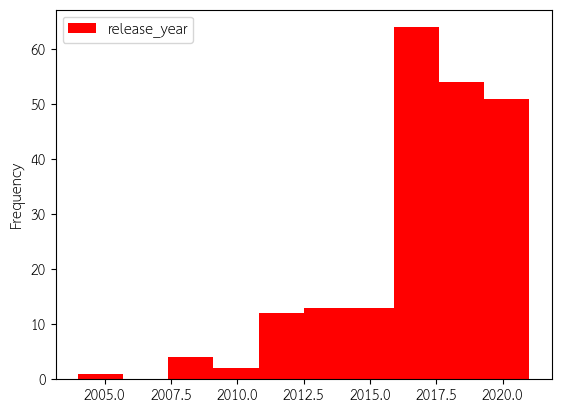

In [20]:
South_Korea_df.plot(kind = 'hist', x= 'date_added', y = 'release_year' , color='red')

**เปรียบเทียบข้อมูลไทยกับเกาหลีใต้**

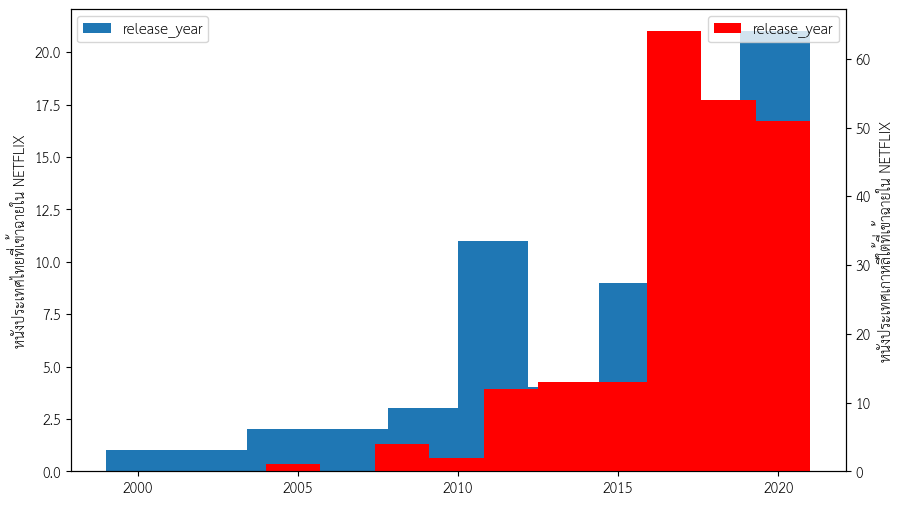

In [21]:
fig = plt.figure(figsize=(10,6))

ax1 = fig.subplots()
ax2 = ax1.twinx()

thailand_df.plot(kind='hist', x='date_added', y='release_year', ax=ax1)
ax1.legend(loc='upper left')
ax1.set_ylabel('หนังประเทศไทยที่เข้าฉายใน NETFLIX')
South_Korea_df.plot(kind='hist', x='date_added', y='release_year', ax=ax2, color='red')
ax2.legend(loc='upper right')
ax2.set_ylabel('หนังประเทศเกาหลีใต้ที่เข้าฉายใน NETFLIX')

fig.show()

**SAVE Picture**

In [22]:
fig.savefig('อัตรารายการภาพยนต์และรายการโชว์ที่ได้เข้าฉายใน_NETFLIX_TH&SKR.png')